## Numerical EDA 
This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.
This dataset from UCI Machine Learning is available on Kaggle: https://www.kaggle.com/uciml/pima-indians-diabetes-database/data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# adjusts style to emulate ggplot 
# a popular plotting package for R
plt.style.use('ggplot')
import seaborn as sns
# Import KNeighborsClassifier from sklearn.neighbors
from sklearn.neighbors import KNeighborsClassifier
import random
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
from sklearn.linear_model import LogisticRegression

In [2]:
# read the dataset into a DataFrame
# currently the columns just have assigned indices
df = pd.read_csv('diabetes.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


This is a binary classification problem. The target variable is Outcome of whether or not a person has diabetes. 1 means the woman has diabetes. 0 means she doesn't.

In [4]:
# learn about dimensions of the DataFrame
# and data types of columns 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


The DataFrame has a total of 768 rows and 9 columns. Currently all of the columns are numerical. BMI and Diabetes Pedigree FUnciton are float64 and the rest are int64. There are no missing values in the dataset. The target variable is in the 'Outcome' column. There are 8 predictor variables or features.

The attributes in this dataset are:
+ **Pregnancies**: number of pregnancies 
+ **Glucose**: Plasma glucose concentration a 2 hours in an oral glucose tolerance test.
+ **BloodPressure**: Diastolic blood pressure (mm Hg)
+ **SkinThickness**: Triceps skin fold thickness (mm)
+ **Insulin**: 2-Hour serum insulin (mu U/ml)
+ **BMI**: Body mass index (weight in kg/(height in m)^2)
+ **DiabetesPedigreeFunction**: Diabetes pedigree function
+ **Age**: Age(years)

In [5]:
# see basic statistics of columns 
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
# check the balance of the target variable diabetes outcome
counts = df['Outcome'].value_counts().to_dict()
print(counts)

{0: 500, 1: 268}


There is class imbalance with a larger number of women not having diabetes (500 count) than having diabetes (268 count). 

## Visual EDA

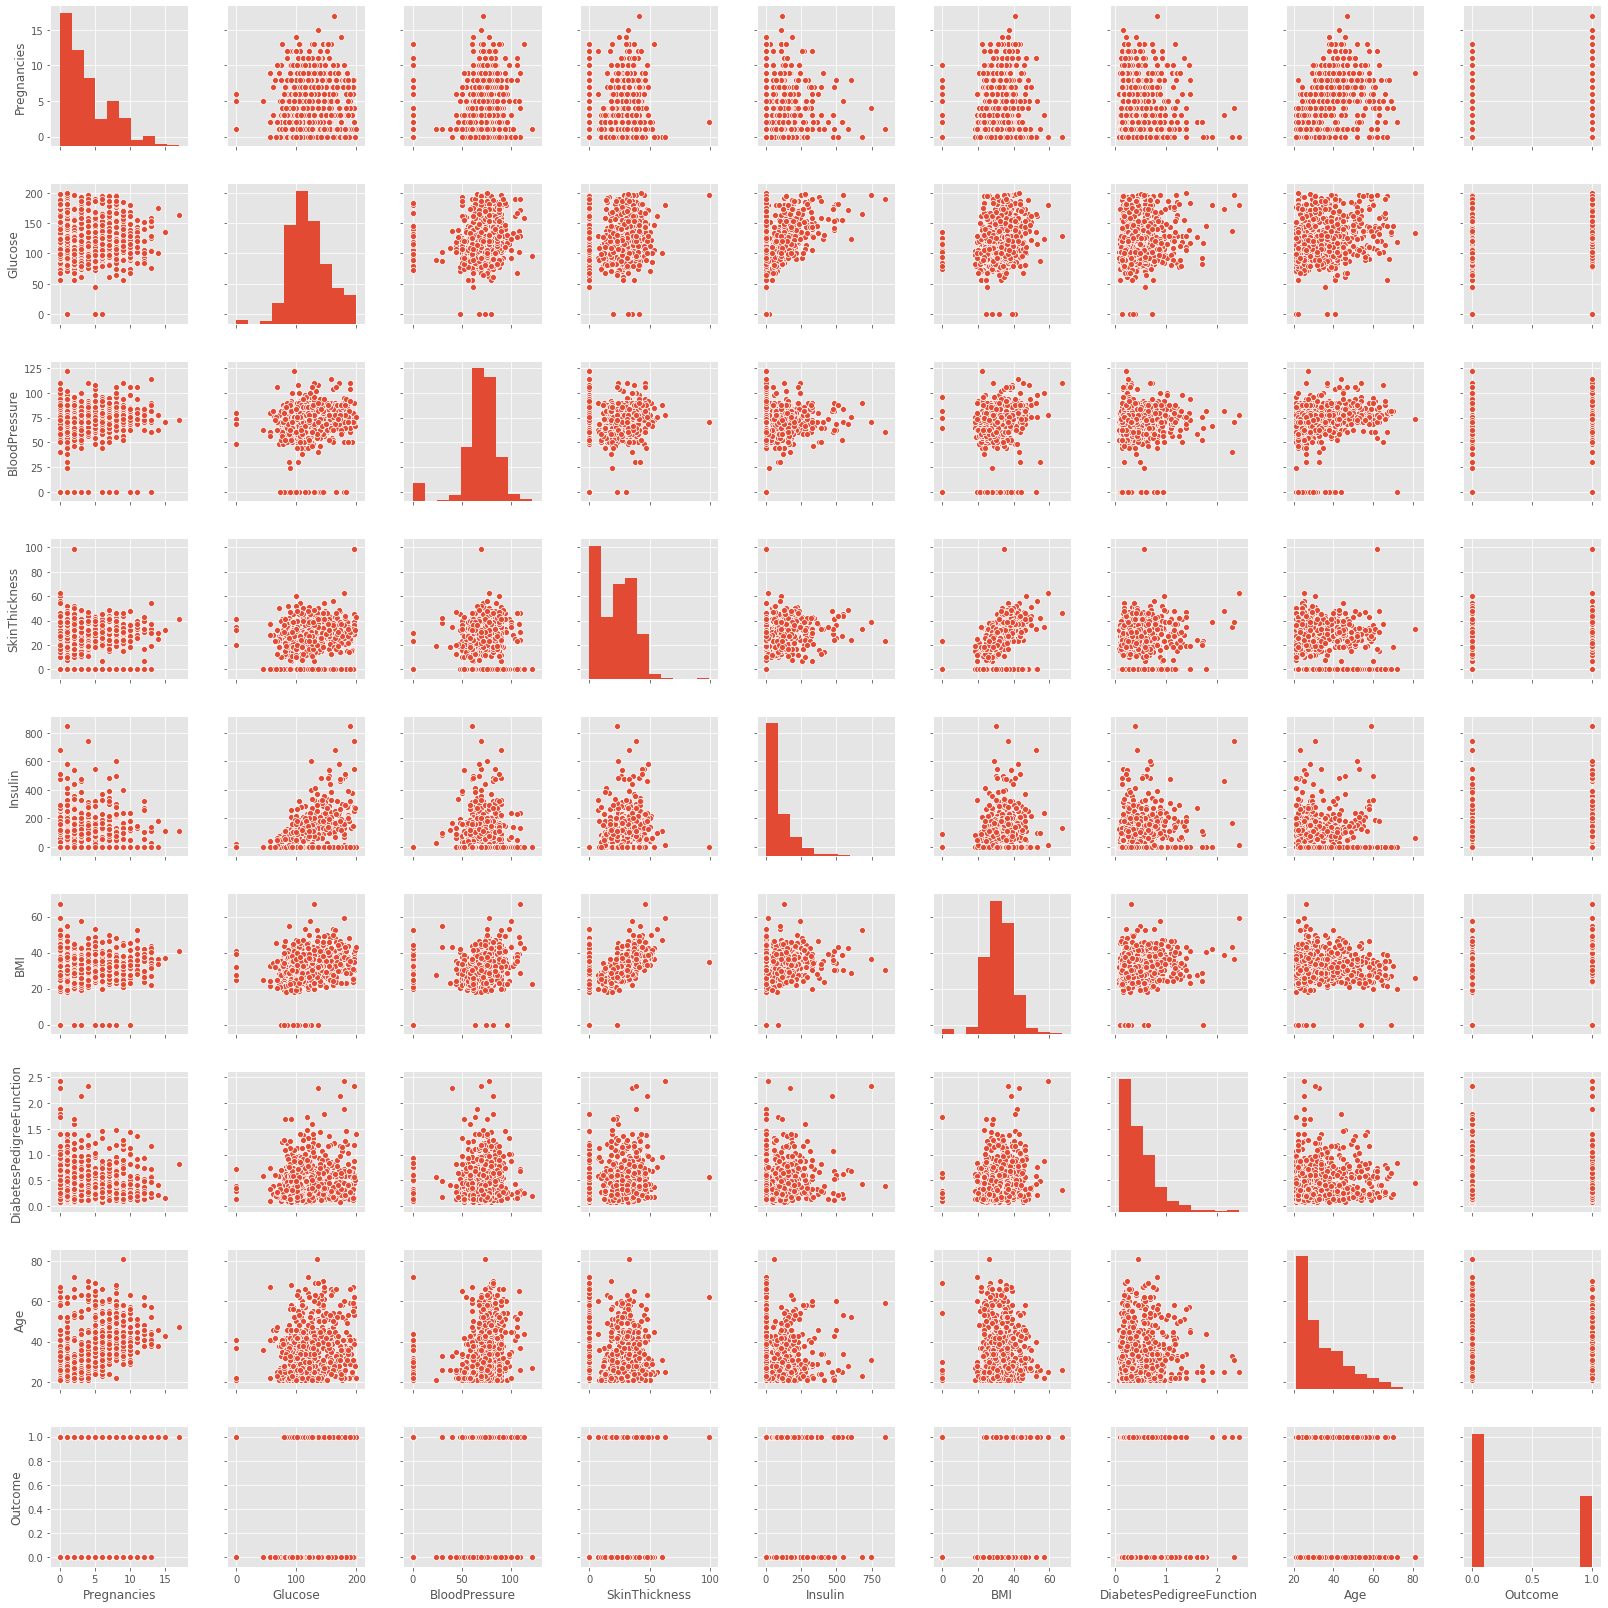

In [7]:
# create pairplots of all numeric factors in the dataset 
sns.pairplot(df)

From the scatterplot matrix, it looks like some features like glucose and insulin as well as skin thickness and bmi have linearity. We explore this further with a heatmap. 

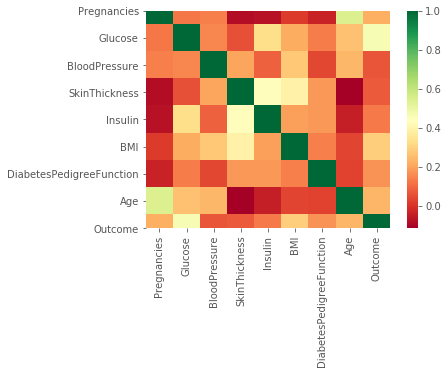

In [8]:
# create a correlation heatmap 
sns.heatmap(df.corr(), square=True, cmap='RdYlGn')

In this matrix, green would show positive correlation while cells that are red show negative correlation. The correlation matrix dosn't show green values above 0.6 indicating strong correlation, but there are some yellow values above 0.4. 

In [9]:
# Create arrays for the features and the response variable
y = df['Outcome'].values
X = df.drop('Outcome', axis=1).values

# K-Nearest Neighbor
Predict the label of a datapoint by looking at k-closest data points and taking a majority vote.
In sci-kit learn, all machine learning models are implemented as Python classes. The models implement that algorithms for learning and predicting. They also store the information learned from the data.

Note: to work with sci-kit learn, we need the following:
+ data as numpy array or pandas dataframe
+ numeric values instead of categorical values
+ no missing values in the data

## Train Test Split 

In [10]:
# Split into training and test set
# Use 40% of the dataset for a test dataset
# random_state=42 makes it possible to replicate the split 
# and reproduce downstream results 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 42)

## Hyperparameter Tuning: Find a Value for K
Try out different values for k to choose a value that prevents overfitting or underfitting on the training dataset.
A larger k is a smoother decision boundary, a less complex model.
A smaller k is a more complex model. A smaller k can also lead to overfitting.

In [11]:
# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 15)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

In [12]:
# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

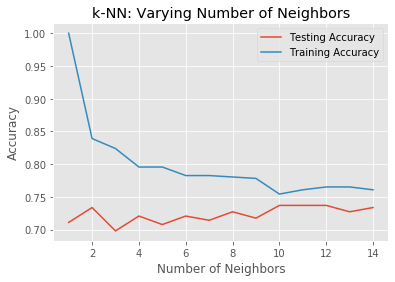

In [13]:
# Generate plot for the model complexity curve 
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

## Classification Metrics

In [14]:
# Instantiate a k-NN classifier: knn
knn = KNeighborsClassifier(n_neighbors=6)

In [15]:
# Fit the classifier to the training data
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')

In [16]:
# Predict the labels of the test data: y_pred
y_pred = knn.predict(X_test)

In [17]:
# Generate the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[176  30]
 [ 56  46]]
              precision    recall  f1-score   support

           0       0.76      0.85      0.80       206
           1       0.61      0.45      0.52       102

    accuracy                           0.72       308
   macro avg       0.68      0.65      0.66       308
weighted avg       0.71      0.72      0.71       308



The accuracy of this classifier is 0.72, but accuracy isn't always an informative metric, especially when there is class imbalance in the dataset. <br>
For the confusion matrix, we can think of predicted values as columns and actual values as rows. In this case, not having diabetes happened to be the **positive class**. There are 176 ***true positives*** where it was predicted that the person didn't have diabetes and it was predicted that they didn't have diabetes. In 56 cases, there was a ***false negative*** where it was predicted that the person didn't have diabetes, and but they actually had diabetes. In 30 cases, there was a ***false positive*** where it was predicted that the person had diabetes, but they actually didn't have diabetes. In 46 cases, there was a ***true negative*** where it was predicted that the person had diabetes and they actually had diabetes. Overall, the classifier has 72% accuracy. 

+ **Precision** is the number of true positives / (true positive + false positive). This is the **positive predicted value** or PPV. The overall precision of 0.71 is fairly high. The classifier did a better job of predicting whether a woman had diabetes if she didn't have diabetes (the larger number of values in the dataset) than if she did have diabetes.  
+ **Recall** is the number of true positives / (true positives + false negatives). This is also called **sensitivity, hit rate, or true positive hit rate**. The average recall for the classifier is also 0.72 which is pretty high. However, the classifier was very strong at identifying people who didn't have diabetes, recall of 0.85, but it performed poorly on people on had diabetes, recall of 0.45. 
+ **F1-Score** is the harmonic mean of precision and recall. It is 2 * (precision * recall) / (precision + recall). In this case, the averae f1-score is 0.71. 
+ **Support** gives the number of samples of the true response that lie in that class. There are 206 people without diabetes and 102 people with diabetes (308 total values) in the test dataset.

Our goal is to predict what people have diabetes. Unfortunately this KNN Classifier has poor performance when it comes to people who have diabetes. 

## Logistic Regression 

By default, the logistic regression threshold is 0.5. This is not specific to logistic regression. k-NN classifiers also have thresholds. If the threshold was 0, the model would predict 1 for all of the data. Both the true positive and false positive rate would be equal to 1. When the threshold is 1, the model predicts 0 for all of the data. The true and false positive rates both equal 0. When we vary the thresholds between these points, we get various false and true positive values. The set of points we get when trying all possible thresholds is called the ROC curve. 

In [18]:
# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=42)

In [19]:
# Create the classifier: logreg
logreg = LogisticRegression()

In [20]:
# Fit the classifier to the training data
logreg.fit(X_train, y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [21]:
# Predict the labels of the test set: y_pred
y_pred = logreg.predict(X_test)

In [22]:
# Compute and print the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[174  32]
 [ 36  66]]
              precision    recall  f1-score   support

           0       0.83      0.84      0.84       206
           1       0.67      0.65      0.66       102

    accuracy                           0.78       308
   macro avg       0.75      0.75      0.75       308
weighted avg       0.78      0.78      0.78       308



We see some improvement compared to the K-NN model, particularly with the ability to classify people with diabetes. Given the importance of recognizing disease, we would hope to see further improvement on these metrics.

## ROC Curve

In [23]:
# Compute predicted probabilities: y_pred_prob
# .predict_proba returns the probability of a sample 
# being in a particular class
y_pred_prob = logreg.predict_proba(X_test)[:,1]

In [24]:
# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

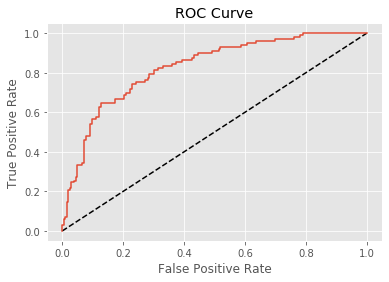

In [25]:
# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

## Area Under the ROC Curve (AUC) 
The larger the area under the ROC Curve, the better the model is. A really good model would have a point in the top left corner because the True Positive Rate would be 0 and the False Positive Rate would be 0. 

In [26]:
# Compute and print AUC score
print("AUC: {}".format(roc_auc_score(y_test, y_pred_prob)))

AUC: 0.8268608414239482


## AUC Using Cross-Validation

If you have a binary classifier that is just randomly making guesses, it would be correct approximately 50% of the time. The resulting ROC curve would be a diagonal line where the True Positive Rate and False Positive Rate are equal. The area under this ROC curve would be 0.5. If the AUC is greater than 0.5, the model is better than random guessing. Always a good sign! 

In [27]:
cv_scores = cross_val_score(logreg, X, y, cv=5, scoring='roc_auc')
# Print list of AUC scores
print("AUC scores computed using 5-fold cross-validation: {}".format(cv_scores))

AUC scores computed using 5-fold cross-validation: [0.7987037  0.80777778 0.81944444 0.86622642 0.85018868]


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

## Precision Recall Curve

The y-axis of the ROC Curve is the True Positive Rate (also called the Recall). Another visual way to evaluate model performance is the **precision recall curve** which is generated by plotting the precision and recall for different thresholds. 
+ A recall of 1 corresponds to a classifier with a low threshold in which all females with diabetes are classified as such, at the expense of many misclassifications of people who did not actually have diabetes. 
+ Precision is undefined for a classifier which makes no positive predictions, that is classifies everyone as not having diabetes. 
+ When the threshold is very close to 1, precision is also 1 because the classifier is very certain about its predictions. 
+ Precision and Recall do not take true negatives into consideration. Precision and Recall are primarily used when we are focused on positives. 